In [120]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
mouse_df.head()



,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [121]:
# read the clinical trial data
trial_df =pd.read_csv(clinical_trial_data_to_load)
trial_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [122]:

# Combine the data into a single dataset
mouse_table = pd.merge(mouse_df,trial_df,on='Mouse ID')

# Display the data table for preview
mouse_table.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [123]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor = mouse_table.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean().reset_index()

# Convert to DataFrame
mean_tumor_table = pd.DataFrame(mean_tumor)

# Preview DataFrame
mean_tumor_table.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [124]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sems_tumor = mouse_table.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem().reset_index()

# Convert to DataFrame
sems_tumor_table = pd.DataFrame(sems_tumor)

# Preview DataFrame
sems_tumor_table.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [125]:
# Minor Data Munging to Re-Format the Data Frames
mean_pivot = mean_tumor_table.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
mean_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [126]:
time = mean_pivot.index.tolist()

In [127]:
capomulin = mean_pivot['Capomulin']
infubinol = mean_pivot['Infubinol']
ketapril = mean_pivot['Ketapril']
placebo = mean_pivot['Placebo']

In [128]:
# Minor Data Munging to Re-Format the Data Frames
sems_pivot = sems_tumor_table.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
semsc = sems_pivot['Capomulin']
semsi = sems_pivot['Infubinol']
semsk = sems_pivot['Ketapril']
semsp = sems_pivot['Placebo']

# Preview that Reformatting worked
sems_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


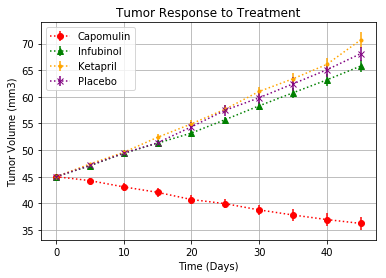

In [129]:
# Generate the Plot (with Error Bars)
plt.errorbar(time, capomulin, yerr=semsc, linestyle =':', marker="o", color="red")
plt.errorbar(time, infubinol, yerr=semsi, linestyle =':', marker="^", color="green")
plt.errorbar(time, ketapril, yerr=semsk, linestyle =':', marker=".", color="orange")
plt.errorbar(time, placebo, yerr=semsp, linestyle =':', marker="x", color="purple")
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="upperleft")
plt.grid()

# Save the Figure
plt.savefig('tumorresponse.png')

# Show the Figure
plt.show()




## Metastatic Response to Treatment

In [130]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metastatic = mouse_table.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean().reset_index()

# Convert to DataFrame
mean_metastatic_table = pd.DataFrame(mean_metastatic)

# Preview DataFrame
mean_metastatic_table.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [131]:
# Store the Standard Error of Metastatic Volumes Grouped by Drug and Timepoint
sems_metastatic = mouse_table.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem().reset_index()

# Convert to DataFrame
sems_metastatic_table = pd.DataFrame(sems_metastatic)

# Preview DataFrame
sems_metastatic_table.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [132]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_pivot = mean_metastatic_table.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
metastatic_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [133]:
metatime = metastatic_pivot.index.tolist()
metacapomulin = metastatic_pivot['Capomulin']
metainfubinol = metastatic_pivot['Infubinol']
metaketapril = metastatic_pivot['Ketapril']
metaplacebo = metastatic_pivot['Placebo']


In [134]:
metasems = sems_metastatic_table.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
 
metasems


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [198]:
metac = metasems['Capomulin']
metai = metasems['Infubinol']
metak = metasems['Ketapril']
metap = metasems['Placebo']

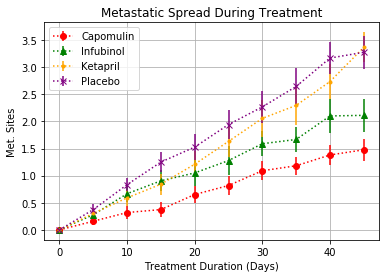

In [199]:
# Generate the Plot (with Error Bars)
plt.errorbar(metatime, metacapomulin, yerr=metac, linestyle =':', marker="o", color="red")
plt.errorbar(metatime, metainfubinol, yerr=metai, linestyle =':', marker="^", color="green")
plt.errorbar(metatime, metaketapril, yerr=metak, linestyle =':', marker=".", color="orange")
plt.errorbar(metatime, metaplacebo, yerr=metap, linestyle =':', marker="x", color="purple")
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.legend(loc="upperleft")
plt.grid()

# Save the Figure
plt.savefig('metaspread.png')

# Show the Figure
plt.show()


## Survival Rates

In [137]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_grouped_df = mouse_table.groupby(['Drug','Timepoint'])['Mouse ID']
mousecount_df = mouse_grouped_df.nunique()

# Convert to DataFrame
# Convert to DataFrame
mousecount_df = pd.DataFrame(mousecount_df).rename(columns={'Mouse ID':'Mouse Count'})

# Preview DataFrame
mousecount_df.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [138]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
mousecount_format = mousecount_df.unstack(0)
mousecount_format = mousecount_format["Mouse Count"]
mousecount_format.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


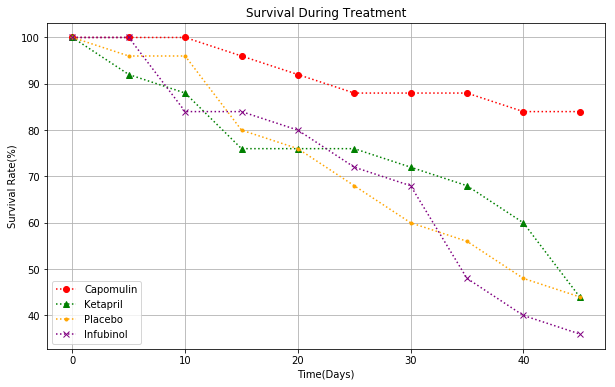

In [139]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize=(10,6))
plt.plot(np.arange(0, 50, 5), mousecount_df.loc["Capomulin", "Mouse Count"]/25*100,
        marker = 'o', label = "Capomulin", linestyle =':',color='red')
plt.plot(np.arange(0, 50, 5), mousecount_df.loc["Ketapril", "Mouse Count"]/25*100,
        marker = '^', label = "Ketapril", linestyle = ':',color='green')
plt.plot(np.arange(0, 50, 5), mousecount_df.loc["Placebo", "Mouse Count"]/25*100,
        marker = '.', label = "Placebo", linestyle =':',color='orange')
plt.plot(np.arange(0, 50, 5), mousecount_df.loc["Infubinol", "Mouse Count"]/25*100,
        marker = 'x', label = "Infubinol", linestyle =':',color='purple')

plt.grid()
plt.title('Survival During Treatment')
plt.xlabel('Time(Days)')
plt.ylabel('Survival Rate(%)')
plt.legend(loc='lower left')

# Save the Figure
plt.savefig('survivalrate.png')

# Show the Figure
plt.show()


## Summary Bar Graph

In [142]:
mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [147]:
# Calculate the percent changes for each drug
tumorchange = (mean_pivot.loc[45,:] - mean_pivot.loc[0, :])/mean_pivot.loc[0, :] * 100
# Display the data to confirm
tumorchange


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [184]:
# Store all Relevant Percent Changes into a Tuple
# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure


In [185]:
percentchange = (tumorchange['Capomulin'],tumorchange['Infubinol'],tumorchange['Ketapril'],tumorchange['Placebo'])

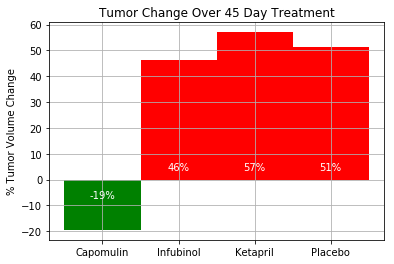

In [197]:
fig, ax = plt.subplots()
index = np.arange(len(percentchange))
width = 1
drugs_pass = plt.bar(index[0], percentchange[0], width, color='green')
drugs_fail = plt.bar(index[1:], percentchange[1:], width, color='red')

plt.title('Tumor Change Over 45 Day Treatment')
plt.ylabel('% Tumor Volume Change')
ax.set_xticks(index)
ax.set_xticklabels(('Capomulin','Infubinol','Ketapril','Placebo'))
plt.grid()

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

def percentfail(drugs):
   for drug in drugs_fail:
       height = drug.get_height()
       plt.text(drug.get_x() + drug.get_width()/2., 3,
               '%d' % int(height) + "%",
               ha='center', va='bottom', color="white")
percentfail(drugs_fail)

def percentpass(drugs):
   for drug in drugs_pass:
       height = drug.get_height()
       plt.text(drug.get_x() + drug.get_width()/2., -8,
               '%d' % int(height) + "%",
               ha='center', va='bottom', color="white")
percentpass(drugs_pass)
  
# Save the Figure
plt.savefig('tumorpercentchange.png')

# Show the Figure
plt.show()